# Importing Packages

In [7]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Data Preperation

## Loading dataset

In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
## Normalizing the data

In [11]:
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
## Reshaping for the neural network

In [15]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape (-1, 28*28)

In [16]:
## One-hot encoding the target labels

In [17]:
y_train = to_categorical (y_train,10)
y_test = to_categorical (y_test,10)

In [ ]:
# Building the model

In [18]:
## Defining a learning rate schedule function

In [21]:
def lr_schedule(epoch, lr):
    if epoch > 10:
        return lr *0.5
    return lr

In [22]:
## Building the neural network model with dropout layers

In [26]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(10, activation ='softmax')
])

C:\Users\furka\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
## Set up early stopping and learning rate scheduler 

In [32]:
early_stopping = EarlyStopping(monitor ='val_loss', patience =3, restore_best_weights = True )
lr_scheduler = LearningRateScheduler(lr_schedule)

In [29]:
## Training the model with early stopping and learning rate scheduler

In [38]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 64, 
    validation_split = 0.2,
    callbacks =[early_stopping, lr_scheduler]
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6557 - loss: 0.9690 - val_accuracy: 0.8457 - val_loss: 0.4337 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8260 - loss: 0.4961 - val_accuracy: 0.8573 - val_loss: 0.3889 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8406 - loss: 0.4458 - val_accuracy: 0.8622 - val_loss: 0.3694 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8504 - loss: 0.4174 - val_accuracy: 0.8728 - val_loss: 0.3610 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8601 - loss: 0.3833 - val_accuracy: 0.8711 - val_loss: 0.3587 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8655 - loss: 0.3735 - val_accuracy: 0.8737 - val_loss: 0.3497 - learning_rate: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8713 - loss: 0.3561 -

In [34]:
# Evaluating the model

In [39]:
y_pred = np.argmax(model.predict(X_test), axis =1)
y_test_classes = np.argmax(y_test, axis =1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [40]:
## Printing the accuracy and classification report

In [43]:
accuracy = accuracy_score(y_test_classes, y_pred)
print('Model Accuracy: ', accuracy)
print("\nClassfication Report: \n", classification_report(y_test_classes, y_pred))

Model Accuracy:  0.8831

Classfication Report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.87      0.91      0.89      1000
           4       0.79      0.82      0.80      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.66      0.68      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [44]:
## Plotting the training history

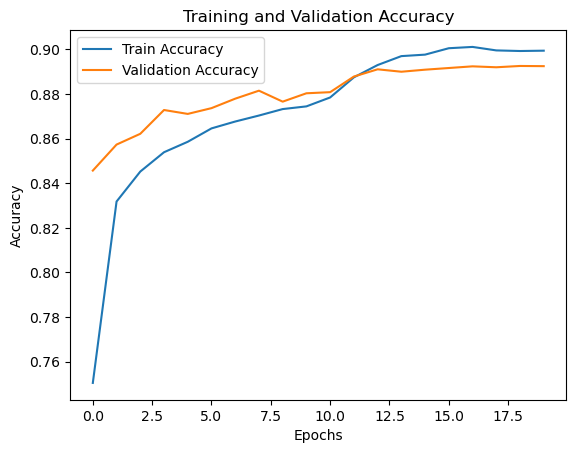

In [46]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()